# House Price Project

## 1. Define the Problem   With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each homeing the model based on new insights or data.


## 2. Gather and Explore the Data

- Data Collection: Collect the relevant dataset(s).
- Exploratory Data Analysis (EDA): Analyze the data to understand its structure, distributions, patterns, and anomalies.
- Data Visualization: Use plots and graphs to visualize relationships between variables. 
oms


## 3. Data Preprocessing

* **Simple Steps**
    * what ever the dataset
    * check the dimensions(shape ) of the dataset.
    * check the numerical features and categorical features with select_dtypes
    * check the skewness of numerical features and fix it with box cox transformations
    * transform numerical features to categorical features like year and months
    * create new features if needed
    * find the missing values in both num and cat features and fill with appropriate values like mean,median,mode
    * encode the cat features with onehotencoder, labelencoder
    * scale the features with standardscaler,robust scaler
    * and fit it with the estimator
    * if needed do features_selection for the most imp features
    * ifneeded regularization of features
    * hence it is completely iterative process to get the best model.
    * 
 to get the best model.

* Data Cleaning: Handle missing values, remove duplicates, and correct errors.
* Feature Engineering: Create new features or modify existing ones to i* ove the model's performance.
* Data Transformation: Normalize, standardize, or encode categorical variables.
* Splitting Data: Split the data into training, validation, and test sets.

## 4. Model Selection
* Choose a Model: Select the appropriate algorithm(s) based on the problem (e.g., linear regression, decision trees, neural networks).
* Baseline Model: Create a simple baseline model for comparison.



## 5. Model Training
* Fit the Model: Train the model using the training data.
* Hyperparameter Tuning: Optimize the model’s parameters to improve performance. Techniques like Grid Search or Random Search can be useful.

## 6. Model Evaluation
   - Validation: Use the validation set to evaluate the model's performance. Adjust the model based on validation results.
   - Performance Metrics: Choose the right metrics for evaluation (e.g., accuracy, precision, recall, F1-score, RMSE, etc.).
   - Cross-Validation: Use cross-validation to assess the model’s robustness.

## 7. Model Testing
   - Final Evaluation: Test the model on the test set to obtain the final performance score.
   - Compare with Baseline: Compare the final model with the baseline to assess improvement.

## 8. Model Interpretation
   - Interpret Results: Understand the model’s predictions and the importance of different features.
   - Visualization: Use visual tools like confusion matrices, ROC curves, and feature importance plots to interpret the model.

## 9. Model Deployment (if applicable)
   - Deploy the Model: If the project requires it, deploy the model into a production environment.
   - Monitor: Continuously monitor the model’s performance and retrain it as necessary.

## 10. Documentation and Reporting
   - Document the Process: Keep detailed records of the methods, parameters, and results.
   - Report Findings: Present your findings and the model's performance in a clear, understandable manner.

## 11. Iteration
   - Refinement: Iterate on the process, refining the model based on new insights or data.


## 2 Gather and Explore the data

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('datas/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv('datas/test.csv')
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
df_total = pd.concat([test.assign(ind="test"), train.assign(ind="train")])
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [6]:
df_total.MSSubClass.value_counts()

MSSubClass
20     1079
60      575
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64

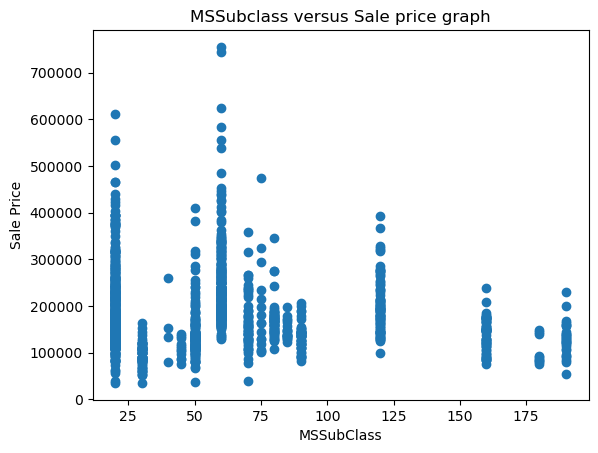

In [7]:
fig, ax = plt.subplots()
ax.scatter(x=train.MSSubClass, y=train.SalePrice)
ax.set(title='MSSubclass versus Sale price graph',
       xlabel='MSSubClass',
       ylabel='Sale Price');

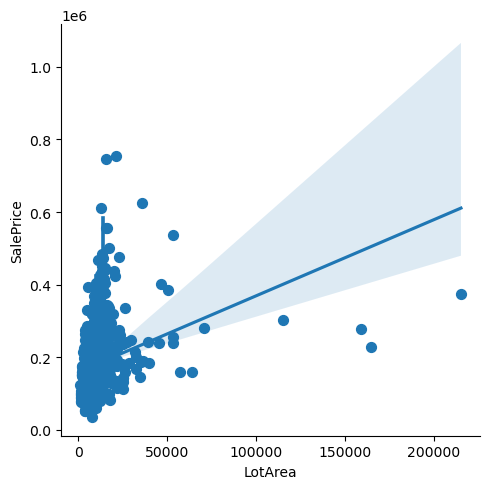

In [9]:
sns.lmplot(x="LotArea", y="SalePrice", data=train, x_estimator=np.mean);

* We can see that when the lot area increase the SalePrice increases

In [10]:
train.Alley.value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

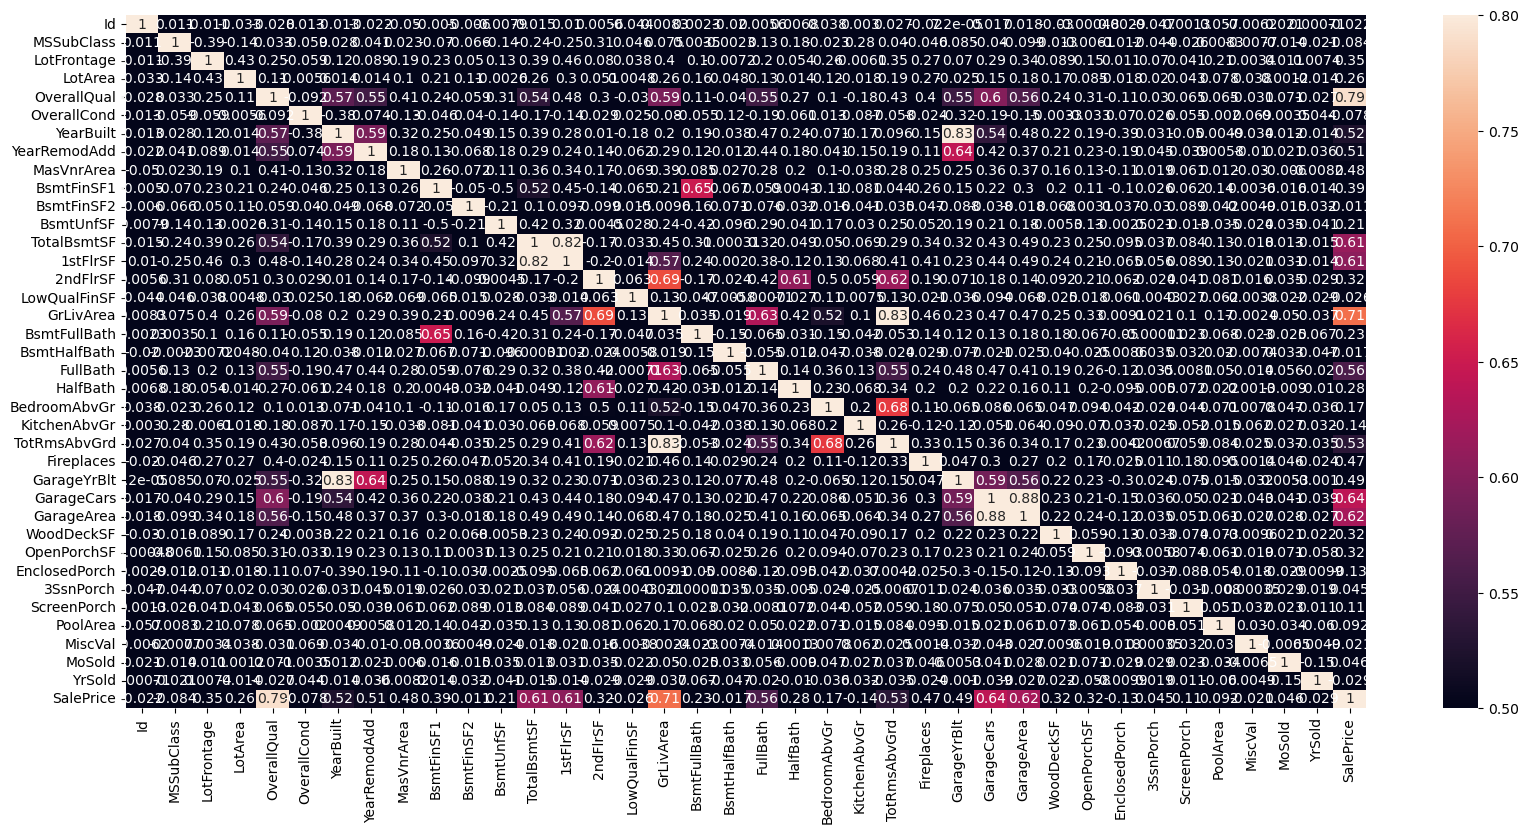

In [11]:
corrmat = train.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corrmat, vmin=.5,vmax=.8,annot=True);

with this we can see that **Garage Area, GarageCars, GrLivArea, TotalbsmtSF, OverallQuall** are so effective for the model

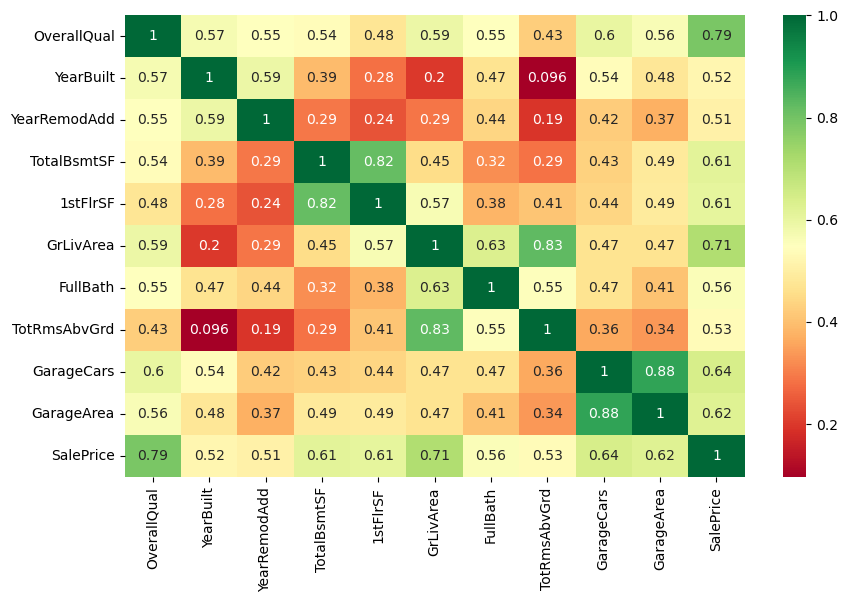

In [12]:
# Let's check in another way
corr_m = train.corr(numeric_only=True)
top_corr_features = corr_m.index[abs(corr_m['SalePrice'] > 0.50)]
fig, ax = plt.subplots(figsize=(10,6))
new_corr = train[top_corr_features].corr(numeric_only=True)
sns.heatmap(new_corr, annot=True, cmap="RdYlGn");

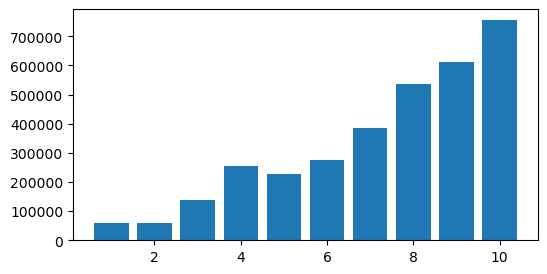

In [13]:
fig, ax = plt.subplots(figsize=(6,3))
ax.bar(train.OverallQual, train.SalePrice);

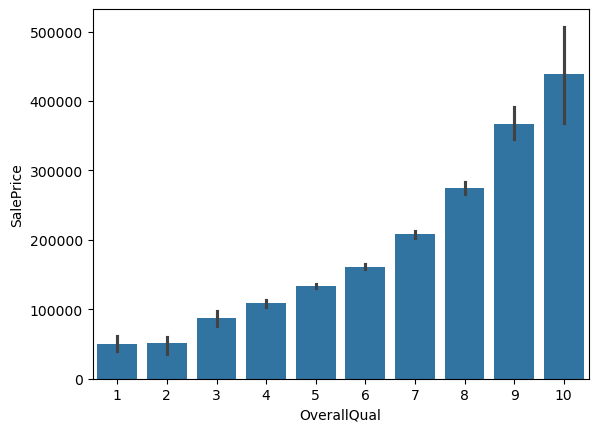

In [14]:
# With sns
sns.barplot(x=train.OverallQual, y=train.SalePrice);

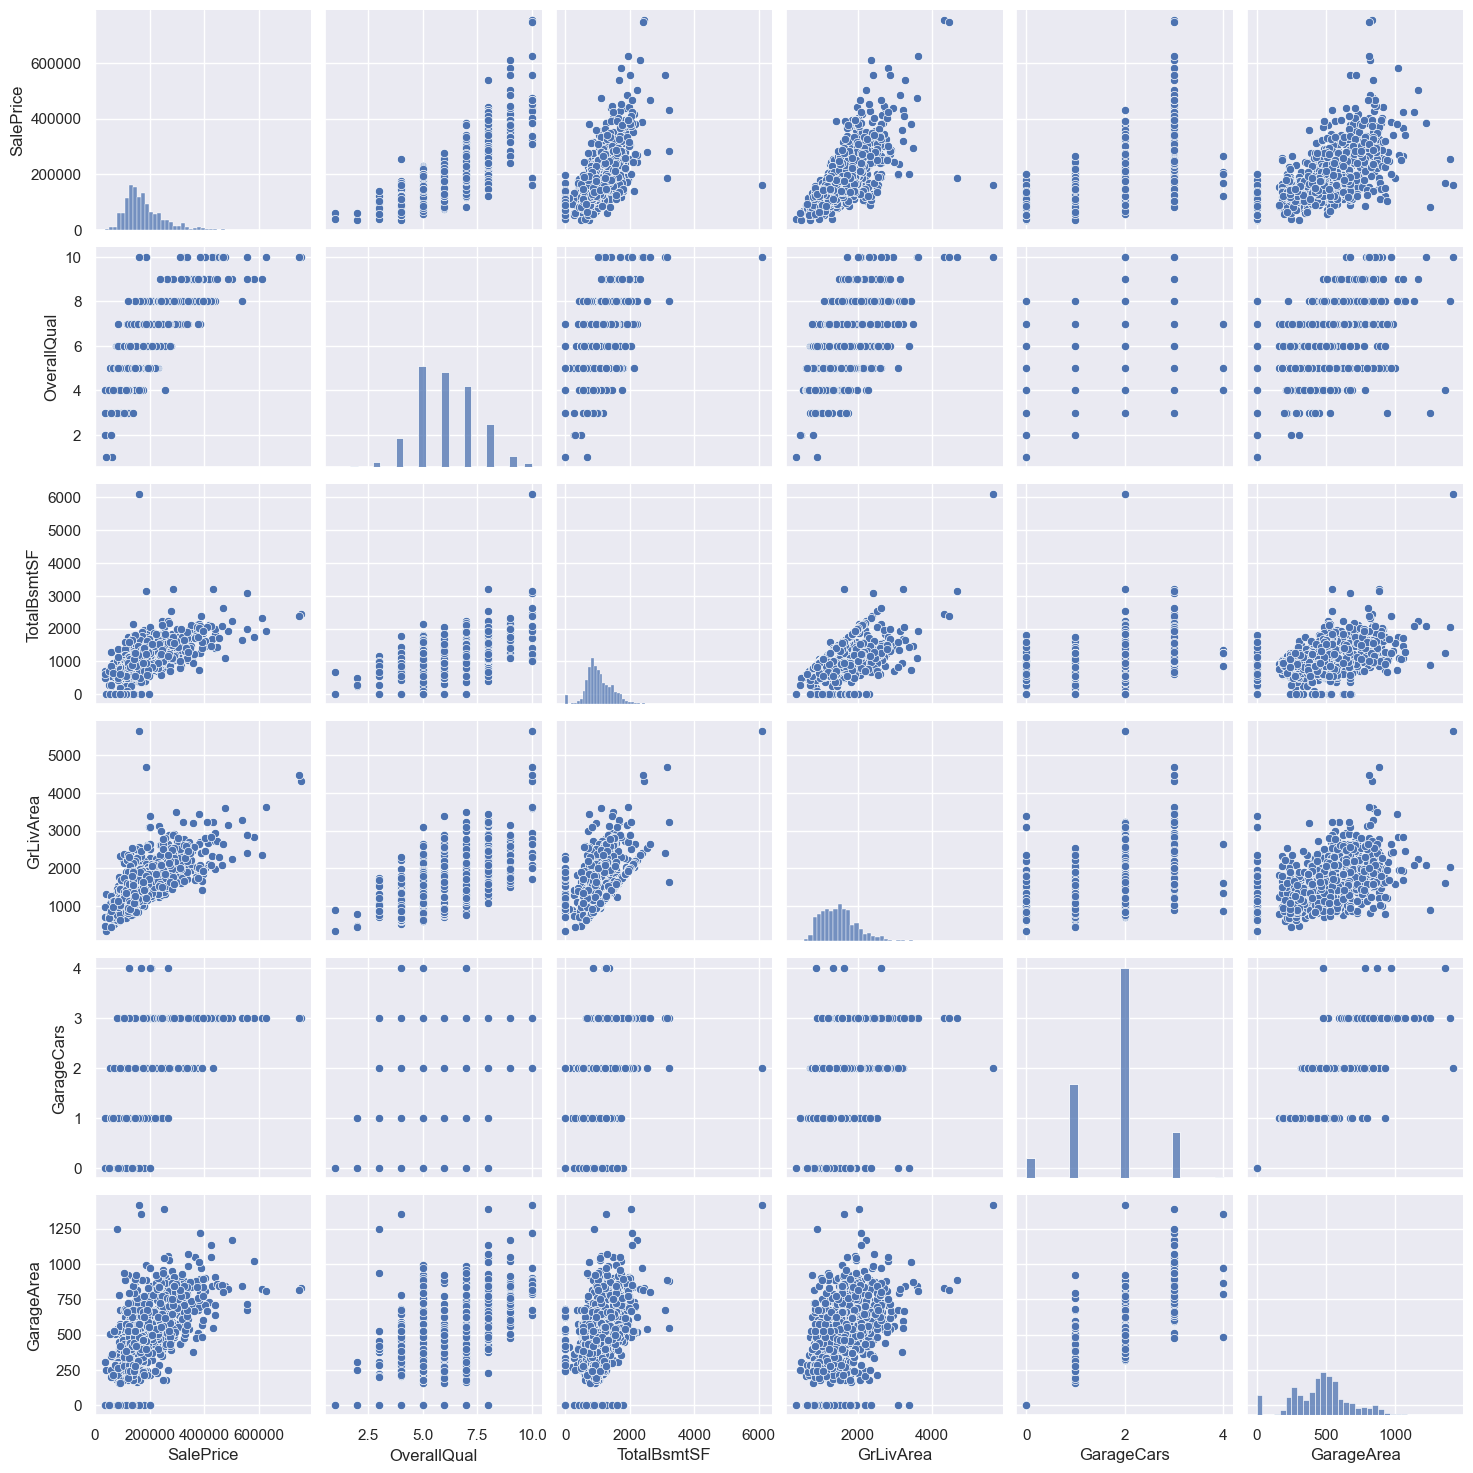

In [15]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'TotalBsmtSF',
       'GrLivArea', 'GarageCars', 'GarageArea',]
sns.pairplot(train[columns]);

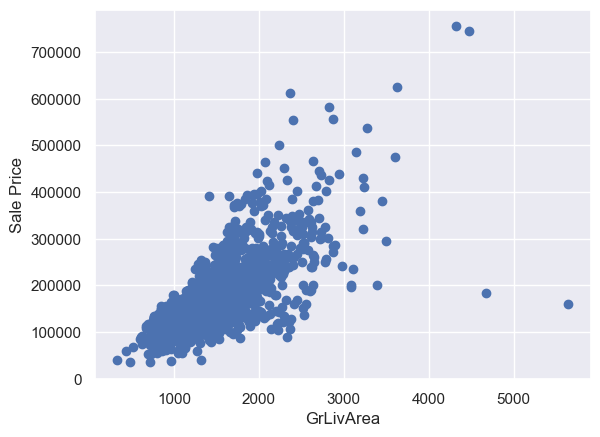

In [16]:
fig , ax = plt.subplots()
ax.scatter(train.GrLivArea, train.SalePrice);
ax.set(xlabel='GrLivArea', ylabel='Sale Price');
# We can see the outlier in the below image

In [21]:
df_total_nulls = df_total.isna().sum()
df_total_nulls = df_total_nulls[df_total_nulls > 0]
df_total_nulls = df_total_nulls.sort_values(ascending=False)
df_total_nulls

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64

Lets Check how important PoolQC

In [24]:
train['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [41]:
test['PoolQC'].value_counts()

PoolQC
Ex    2
Gd    1
Name: count, dtype: int64

In [25]:
train['PoolArea'].value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

In [39]:
train['PoolQC'].fillna('empty', inplace=True)
train.PoolQC

0       empty
1       empty
2       empty
3       empty
4       empty
        ...  
1455    empty
1456    empty
1457    empty
1458    empty
1459    empty
Name: PoolQC, Length: 1460, dtype: object

In [40]:
train['PoolQC'].value_counts()

PoolQC
empty    1453
Gd          3
Ex          2
Fa          2
Name: count, dtype: int64

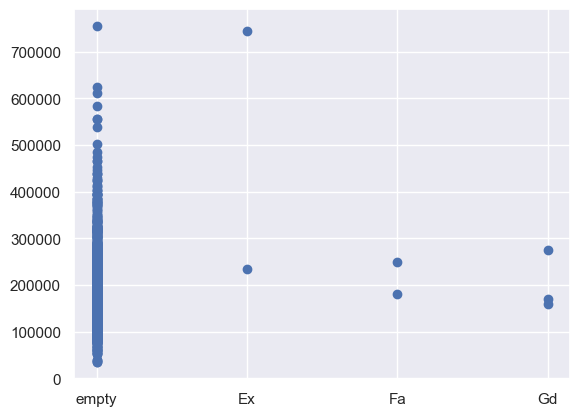

In [42]:
fig, ax = plt.subplots()
ax.scatter(x=train.PoolQC, y=train.SalePrice)

In [51]:
non_nulls =[]
for key in train.keys():
    if train[key].dtype == 'O':
        if train[key].isna().sum() < 1:
            non_nulls.append(key)

print(non_nulls)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition']


In [52]:
train[non_nulls]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,PoolQC,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,Gd,Typ,Y,empty,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Ex,Y,TA,Typ,Y,empty,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,Gd,Typ,Y,empty,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Gd,Y,Gd,Typ,Y,empty,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Ex,Y,Gd,Typ,Y,empty,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,PConc,GasA,Ex,Y,TA,Typ,Y,empty,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,CBlock,GasA,TA,Y,TA,Min1,Y,empty,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Stone,GasA,Ex,Y,Gd,Typ,Y,empty,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,CBlock,GasA,Gd,Y,Gd,Typ,Y,empty,WD,Normal


In [53]:
small_array = ['MSZoning', 'Street', 'LotShape']

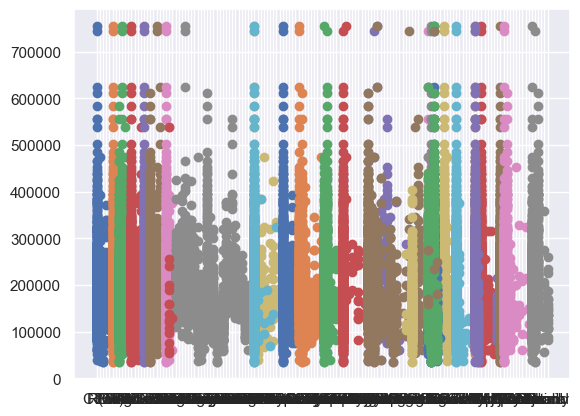

In [57]:
for label in non_nulls:
    plt.scatter(train[label], train.SalePrice)